# Brincando com casinhas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


path = "./"
file = "kc_house_data.csv"
ds = pd.read_csv(f"{path+file}", sep=",")

In [2]:
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## fazendo faxina

In [7]:
ds.isna().sum()

id               0
date             0
price            0
bedrooms         4
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
ds.dropna(inplace=True)
# ds = ds.dropna()
ds.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# o que nos queremos?
- verificar a correlação entre o ano de contrução da casa e seu preço.


In [11]:
q1 = ds[["yr_built", "yr_renovated", "price"]]
q1.describe()

,yr_built,yr_renovated,price
count,21608.000000,21608.000000,2.160800e+04
mean,1971.003286,84.421788,5.401446e+05
std,29.374360,401.723661,3.671482e+05
min,1900.000000,0.000000,7.500000e+04
25%,1951.000000,0.000000,3.220000e+05
50%,1975.000000,0.000000,4.500000e+05
75%,1997.000000,0.000000,6.450000e+05
max,2015.000000,2015.000000,7.700000e+06


# vendo 👀

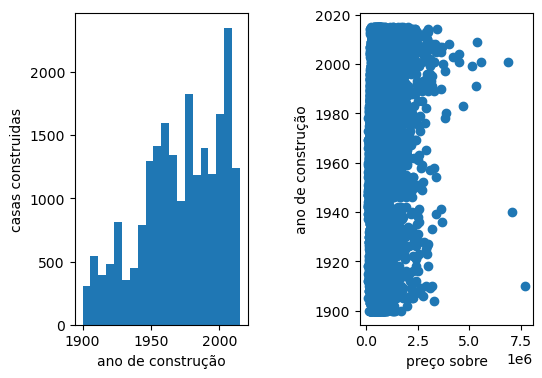

In [120]:
figura, (graf1, graf2) = plt.subplots(1, 2)
figura.tight_layout(pad=5)
graf1.hist(q1.yr_built, bins=20)
graf1.set(xlabel="ano de construção", ylabel="casas construidas")
graf2.scatter(q1.price, q1.yr_built)
graf2.set(xlabel="preço sobre", ylabel="ano de construção")
figura.show()

# para o segundo gráfico eu queria discretizar a coluna "ano de construção" e plotar um graf de barras onde cada bin, 
# seria o intervalo, dai no eixo y ficaria o preço total ou a frequencia, mas falhei miseravelmente em conseguir...

# tentantiva fracassada

In [57]:
def creatingInteval(x, y, p):
    v = []
    for i in range(x, y, p):
        v.append(i)
    return v

intervalos = creatingInteval(1900, 2030, 25)
#np.arange(1900, 2030, 25)

[1900, 1925, 1950, 1975, 2000, 2025]
[1900 1925 1950 1975 2000 2025]


In [149]:
# separando casas em grupos, aka discretização
grupos = pd.cut(q1["yr_built"], intervalos)
grupos = q1.groupby(grupos)
print(grupos.count())
print(grupos.sum()["price"])

## empaquei aqui por n saber como plotar

              yr_built  yr_renovated  price
yr_built                                   
(1900, 1925]      2021          2021   2021
(1925, 1950]      3078          3078   3078
(1950, 1975]      5746          5746   5746
(1975, 2000]      6137          6137   6137
(2000, 2025]      4539          4539   4539
yr_built
(1900, 1925]    1.210192e+09
(1925, 1950]    1.559898e+09
(1950, 1975]    2.711102e+09
(1975, 2000]    3.346114e+09
(2000, 2025]    2.793557e+09
Name: price, dtype: float64


# voltando ao que importa...

In [150]:
q1[["yr_built","price"]].corr()

,yr_built,price
yr_built,1.000000,0.054084
price,0.054084,1.000000


# Conclusão
- Por mais que só usamos uma função (e nem sabemos como ela funciona) podemos concluir que não existe correlação (quase 0).
- Pelo gráfico "scatter" não podemos concluir nehuma tendência